# Carrier On-Time and Delay Performance (1987-present)
## by (Nehal Nabil)

## Preliminary Wrangling

> The dataset reports flights in the United States, including carriers, arrival and departure delays from 1987 to 2020.
The report will gather & analyze flights ofJanuary in these years (1988, 1995, 2000, 2007, 2015, 2020) and start to resolve the following questions :

>> What are the best US cities in terms of no. of Flights and delayed and cancelled flighes?

>> What are the best airlines in terms of no. of Flights and delayed and cancelled flighes?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load data from several CSV files into one dataframe

filenames = glob.glob("*.csv")

files_list = []

for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    files_list.append(df)

flights_df = pd.concat(files_list, axis=0, ignore_index=True)
flights_df.head(10)

,YEAR,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 24
0,1988,1,9,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,846.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988,1,10,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,846.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988,1,11,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,838.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988,1,12,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,843.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1988,1,13,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,830.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1988,1,14,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,832.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1988,1,15,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,834.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1988,1,16,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,823.0,-7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,1,17,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,822.0,-8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1988,1,18,AA,19805,11278,1127801,DCA,"Washington, DC",14492,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071233 entries, 0 to 3071232
Data columns (total 25 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   MONTH                  int64  
 2   DAY_OF_MONTH           int64  
 3   OP_UNIQUE_CARRIER      object 
 4   OP_CARRIER_AIRLINE_ID  int64  
 5   ORIGIN_AIRPORT_ID      int64  
 6   ORIGIN_AIRPORT_SEQ_ID  int64  
 7   ORIGIN                 object 
 8   ORIGIN_CITY_NAME       object 
 9   DEST_AIRPORT_ID        int64  
 10  DEST_AIRPORT_SEQ_ID    int64  
 11  DEST                   object 
 12  DEST_CITY_NAME         object 
 13  DEP_TIME               float64
 14  DEP_DELAY              float64
 15  ARR_TIME               float64
 16  ARR_DELAY              float64
 17  CANCELLED              float64
 18  CANCELLATION_CODE      object 
 19  CARRIER_DELAY          float64
 20  WEATHER_DELAY          float64
 21  NAS_DELAY              float64
 22  SECURITY_DELAY    

In [4]:
flights_df.describe()

,YEAR,MONTH,DAY_OF_MONTH,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 24
count,3.071233e+06,3071233.0,3.071233e+06,3.071233e+06,3.071233e+06,3.071233e+06,3.071233e+06,3.071233e+06,2.982604e+06,2.982569e+06,2.975423e+06,2.973736e+06,3.071233e+06,328380.000000,328380.000000,328380.000000,328380.000000,328380.000000,0.0
mean,2.005203e+03,1.0,1.598842e+01,1.991952e+04,1.272250e+04,1.272252e+06,1.272215e+04,1.272217e+06,1.348102e+03,9.130611e+00,1.493305e+03,6.598784e+00,2.904957e-02,18.090334,3.490794,14.269980,0.080142,20.649175,NaN
std,1.098407e+01,0.0,8.944471e+00,3.622495e+02,1.530869e+03,1.530867e+05,1.530449e+03,1.530447e+05,4.824499e+02,3.394458e+01,5.066665e+02,3.645840e+01,1.679455e-01,50.635762,25.267832,28.030767,2.046446,41.547847,NaN
min,1.988000e+03,1.0,1.000000e+00,1.938600e+04,1.013500e+04,1.013501e+06,1.013500e+04,1.013501e+06,1.000000e+00,-8.720000e+02,1.000000e+00,-9.910000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.995000e+03,1.0,8.000000e+00,1.970400e+04,1.129200e+04,1.129202e+06,1.129200e+04,1.129202e+06,9.340000e+02,-3.000000e+00,1.116000e+03,-1.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2.007000e+03,1.0,1.600000e+01,1.980500e+04,1.289200e+04,1.289201e+06,1.289200e+04,1.289201e+06,1.336000e+03,0.000000e+00,1.522000e+03,-1.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,0.000000,0.000000,NaN
75%,2.015000e+03,1.0,2.400000e+01,2.035500e+04,1.409800e+04,1.409802e+06,1.409800e+04,1.409801e+06,1.740000e+03,8.000000e+00,1.919000e+03,1.200000e+01,0.000000e+00,18.000000,0.000000,19.000000,0.000000,26.000000,NaN
max,2.020000e+03,1.0,3.100000e+01,2.117100e+04,1.686900e+04,1.686901e+06,1.686900e+04,1.686901e+06,2.400000e+03,2.489000e+03,2.400000e+03,2.536000e+03,1.000000e+00,2489.000000,1525.000000,1408.000000,241.000000,2228.000000,NaN


In [5]:
flights = flights_df.copy() #make a copy of the dataframe to do all cleaning and wrangling part over it

In [6]:
#drop unnecessary columns
flights= flights.drop(columns=['MONTH','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 24'])
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071233 entries, 0 to 3071232
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   DAY_OF_MONTH           int64  
 2   OP_UNIQUE_CARRIER      object 
 3   OP_CARRIER_AIRLINE_ID  int64  
 4   ORIGIN_AIRPORT_ID      int64  
 5   ORIGIN                 object 
 6   ORIGIN_CITY_NAME       object 
 7   DEST_AIRPORT_ID        int64  
 8   DEST                   object 
 9   DEST_CITY_NAME         object 
 10  DEP_TIME               float64
 11  DEP_DELAY              float64
 12  ARR_TIME               float64
 13  ARR_DELAY              float64
 14  CANCELLED              float64
 15  CANCELLATION_CODE      object 
 16  CARRIER_DELAY          float64
 17  WEATHER_DELAY          float64
 18  NAS_DELAY              float64
 19  SECURITY_DELAY         float64
 20  LATE_AIRCRAFT_DELAY    float64
dtypes: float64(10), int64(5), object(6)
memory usage: 492.

In [7]:
#combine the delay reasons columns into two columns, one for the delay reson and the other to the delay amount
flights = flights.melt(id_vars=['YEAR','DAY_OF_MONTH','OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','ORIGIN_AIRPORT_ID','ORIGIN','ORIGIN_CITY_NAME',
                      'DEST_AIRPORT_ID','DEST', 'DEST_CITY_NAME','DEP_TIME','DEP_DELAY','ARR_TIME','ARR_DELAY','CANCELLED','CANCELLATION_CODE'], 
             value_vars=['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], var_name='Delay_cause', value_name='Delay_cause_time')
flights.head(10)

,YEAR,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,Delay_cause,Delay_cause_time
0,1988,9,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",726.0,0.0,846.0,16.0,0.0,NaN,CARRIER_DELAY,NaN
1,1988,10,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",727.0,1.0,846.0,16.0,0.0,NaN,CARRIER_DELAY,NaN
2,1988,11,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",725.0,-1.0,838.0,8.0,0.0,NaN,CARRIER_DELAY,NaN
3,1988,12,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",726.0,0.0,843.0,13.0,0.0,NaN,CARRIER_DELAY,NaN
4,1988,13,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",728.0,2.0,830.0,0.0,0.0,NaN,CARRIER_DELAY,NaN
5,1988,14,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",727.0,1.0,832.0,2.0,0.0,NaN,CARRIER_DELAY,NaN
6,1988,15,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",727.0,1.0,834.0,4.0,0.0,NaN,CARRIER_DELAY,NaN
7,1988,16,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",726.0,0.0,823.0,-7.0,0.0,NaN,CARRIER_DELAY,NaN
8,1988,17,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",728.0,2.0,822.0,-8.0,0.0,NaN,CARRIER_DELAY,NaN
9,1988,18,AA,19805,11278,DCA,"Washington, DC",14492,RDU,"Raleigh/Durham, NC",1007.0,161.0,NaN,NaN,0.0,NaN,CARRIER_DELAY,NaN


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356165 entries, 0 to 15356164
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   DAY_OF_MONTH           int64  
 2   OP_UNIQUE_CARRIER      object 
 3   OP_CARRIER_AIRLINE_ID  int64  
 4   ORIGIN_AIRPORT_ID      int64  
 5   ORIGIN                 object 
 6   ORIGIN_CITY_NAME       object 
 7   DEST_AIRPORT_ID        int64  
 8   DEST                   object 
 9   DEST_CITY_NAME         object 
 10  DEP_TIME               float64
 11  DEP_DELAY              float64
 12  ARR_TIME               float64
 13  ARR_DELAY              float64
 14  CANCELLED              float64
 15  CANCELLATION_CODE      object 
 16  Delay_cause            object 
 17  Delay_cause_time       float64
dtypes: float64(6), int64(5), object(7)
memory usage: 2.1+ GB


In [9]:
#change the time format into readable one

flights['DEP_TIME'] = flights['DEP_TIME'].apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
flights['DEP_TIME'] = flights['DEP_TIME'].str[:2] + ':' + flights['DEP_TIME'].str[2:]
flights['DEP_TIME'] = pd.Series(flights['DEP_TIME']).str.replace('24', '00', regex=True)
flights['DEP_TIME'] = pd.to_datetime(flights['DEP_TIME'], format='%H:%M').dt.time

flights['ARR_TIME'] = flights['ARR_TIME'].apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
flights['ARR_TIME'] =flights['ARR_TIME'].str[:2] + ':' + flights['ARR_TIME'].str[2:]
flights['ARR_TIME'] = pd.Series(flights['ARR_TIME']).str.replace('24', '00', regex=True)
flights['ARR_TIME'] = pd.to_datetime(flights['ARR_TIME'], format='%H:%M').dt.time

flights.sample(10)

,YEAR,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,Delay_cause,Delay_cause_time
14013881,2007,11,NW,19386,13931,ORF,"Norfolk, VA",11433,DTW,"Detroit, MI",12:28:00,-10.0,14:37:00,1.0,0.0,NaN,LATE_AIRCRAFT_DELAY,NaN
12167282,2020,19,B6,20409,11278,DCA,"Washington, DC",11697,FLL,"Fort Lauderdale, FL",07:56:00,-4.0,10:35:00,-6.0,0.0,NaN,SECURITY_DELAY,NaN
12464686,1988,20,NW,19386,12266,IAH,"Houston, TX",13244,MEM,"Memphis, TN",06:50:00,0.0,08:20:00,10.0,0.0,NaN,LATE_AIRCRAFT_DELAY,NaN
6913779,1995,18,US,20355,10721,BOS,"Boston, MA",14576,ROC,"Rochester, NY",20:15:00,30.0,21:25:00,19.0,0.0,NaN,NAS_DELAY,NaN
20758,1988,16,CO,19704,12266,IAH,"Houston, TX",15016,STL,"St. Louis, MO",20:36:00,1.0,22:27:00,-12.0,0.0,NaN,CARRIER_DELAY,NaN
7362176,2000,12,DL,19790,10397,ATL,"Atlanta, GA",13930,ORD,"Chicago, IL",08:15:00,0.0,09:26:00,16.0,0.0,NaN,NAS_DELAY,NaN
136227,1988,8,CO,19704,14321,PWM,"Portland, ME",11618,EWR,"Newark, NJ",NaT,NaN,NaT,NaN,1.0,NaN,CARRIER_DELAY,NaN
10298575,2000,18,UA,19977,11986,GRR,"Grand Rapids, MI",13930,ORD,"Chicago, IL",14:29:00,19.0,14:22:00,23.0,0.0,NaN,SECURITY_DELAY,NaN
2532609,2020,6,DL,19790,14730,SDF,"Louisville, KY",10397,ATL,"Atlanta, GA",17:30:00,-5.0,18:37:00,-31.0,0.0,NaN,CARRIER_DELAY,NaN
1210499,2000,15,NW,19386,13485,MSN,"Madison, WI",13487,MSP,"Minneapolis, MN",14:45:00,-5.0,15:50:00,-10.0,0.0,NaN,CARRIER_DELAY,NaN


In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356165 entries, 0 to 15356164
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   YEAR                   int64  
 1   DAY_OF_MONTH           int64  
 2   OP_UNIQUE_CARRIER      object 
 3   OP_CARRIER_AIRLINE_ID  int64  
 4   ORIGIN_AIRPORT_ID      int64  
 5   ORIGIN                 object 
 6   ORIGIN_CITY_NAME       object 
 7   DEST_AIRPORT_ID        int64  
 8   DEST                   object 
 9   DEST_CITY_NAME         object 
 10  DEP_TIME               object 
 11  DEP_DELAY              float64
 12  ARR_TIME               object 
 13  ARR_DELAY              float64
 14  CANCELLED              float64
 15  CANCELLATION_CODE      object 
 16  Delay_cause            object 
 17  Delay_cause_time       float64
dtypes: float64(4), int64(5), object(9)
memory usage: 2.1+ GB


In [11]:
flights.describe()

,YEAR,DAY_OF_MONTH,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,ARR_DELAY,CANCELLED,Delay_cause_time
count,1.535616e+07,1.535616e+07,1.535616e+07,1.535616e+07,1.535616e+07,1.491284e+07,1.486868e+07,1.535616e+07,1.641900e+06
mean,2.005203e+03,1.598842e+01,1.991952e+04,1.272250e+04,1.272215e+04,9.130611e+00,6.598784e+00,2.904957e-02,1.131609e+01
std,1.098406e+01,8.944470e+00,3.622494e+02,1.530869e+03,1.530449e+03,3.394457e+01,3.645839e+01,1.679455e-01,3.477864e+01
min,1.988000e+03,1.000000e+00,1.938600e+04,1.013500e+04,1.013500e+04,-8.720000e+02,-9.910000e+02,0.000000e+00,0.000000e+00
25%,1.995000e+03,8.000000e+00,1.970400e+04,1.129200e+04,1.129200e+04,-3.000000e+00,-1.000000e+01,0.000000e+00,0.000000e+00
50%,2.007000e+03,1.600000e+01,1.980500e+04,1.289200e+04,1.289200e+04,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
75%,2.015000e+03,2.400000e+01,2.035500e+04,1.409800e+04,1.409800e+04,8.000000e+00,1.200000e+01,0.000000e+00,9.000000e+00
max,2.020000e+03,3.100000e+01,2.117100e+04,1.686900e+04,1.686900e+04,2.489000e+03,2.536000e+03,1.000000e+00,2.489000e+03


### What is the structure of your dataset?

> There was 3071233 flights in the following observed years (1988,1995,2000,2007,2015,2020), and the dataset has around 17 features to be investigated. 

### What is/are the main feature(s) of interest in your dataset?

> Flights destination, cancellation, delay time and its reasons.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> OP_CARRIER_AIRLINE_ID, DEST_CITY_NAME, DEP_DELAY, CANCELLATION, Delay_cause and YEAR

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

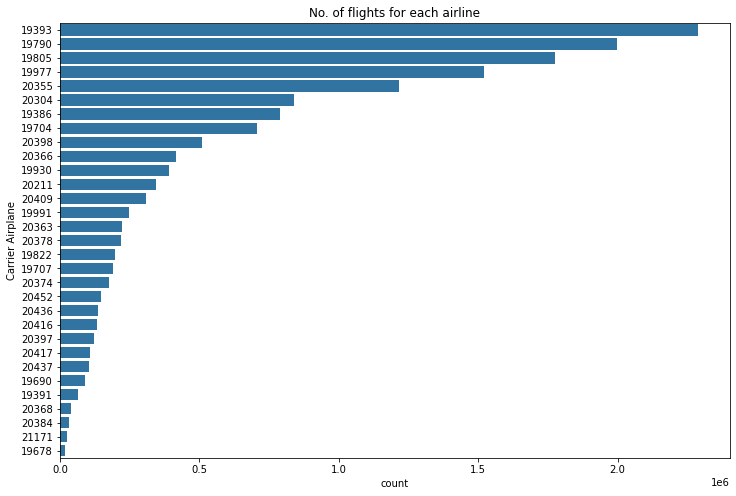

In [12]:
#count the flights no. for each airline

plt.figure(figsize=[12,8]);
base_color = sb.color_palette()[0];

count_order = flights['OP_CARRIER_AIRLINE_ID'].value_counts().index

sb.countplot(data=flights, y='OP_CARRIER_AIRLINE_ID', color=base_color, order=count_order);

plt.ylabel('Carrier Airplane');
plt.xlabel('count');
plt.title('No. of flights for each airline');

> There is an obvious differnce among airlines in flights' number.
it's clear that carier airline (19393) has more than 2 million flights among the selected years while another courier airlines like (19678) has less than 500000 flights.

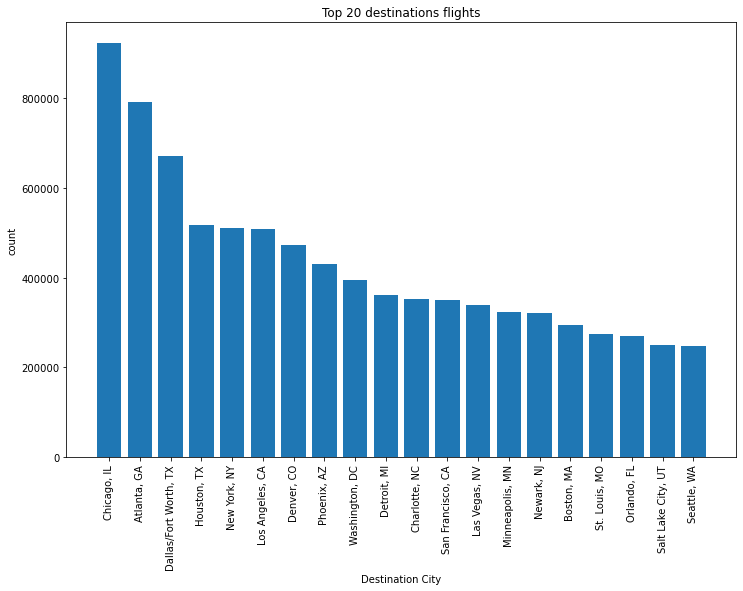

In [13]:
# get the top 20 visited destinaations


plt.figure(figsize=[12,8]);

# Return the Series having highest 20 frequency count of each unique value
flights_sub = flights['DEST_CITY_NAME'].value_counts().nlargest(20);

# Return list having destination cities names of highest 20 frequency count
from collections import Counter
x = [i for i, j in Counter(flights['DEST_CITY_NAME']).most_common(20)]

plt.bar(x,flights_sub);

#plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

plt.xticks(rotation=90);

plt.xlabel('Destination City');
plt.ylabel('count');
plt.title('Top 20 destinations flights');

> Among the selected years, Chicago has the most frequent no. of flights, followed by Atlanta
The diffeence between other cities is small.

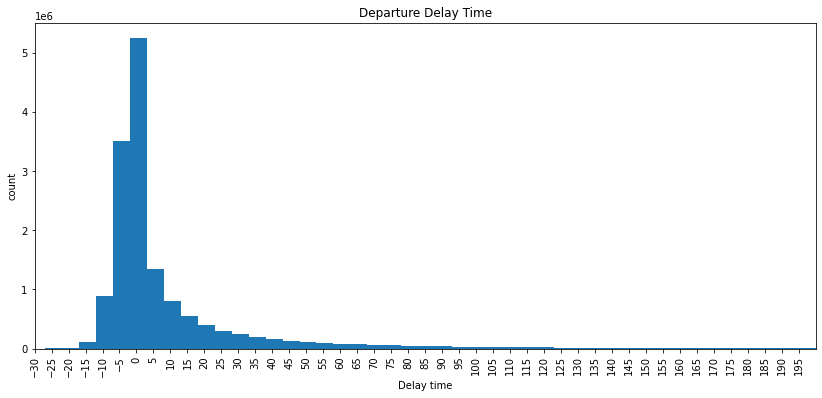

In [14]:
#Distribution of departure delay time

plt.figure(figsize=[14,6]);

bin_edges = np.arange(flights.DEP_DELAY.min(), flights.DEP_DELAY.max()+5, 5);
plt.hist(flights.DEP_DELAY, bins=bin_edges);
plt.xlim(-30,200);
plt.xticks(np.arange(-30, 200, 5), rotation = 90);
plt.xlabel('Delay time');
plt.ylabel('count');
plt.title('Departure Delay Time');

> Delay ratio is concenterated between -12 to 25 minutes, and the distribution is skewed to the right

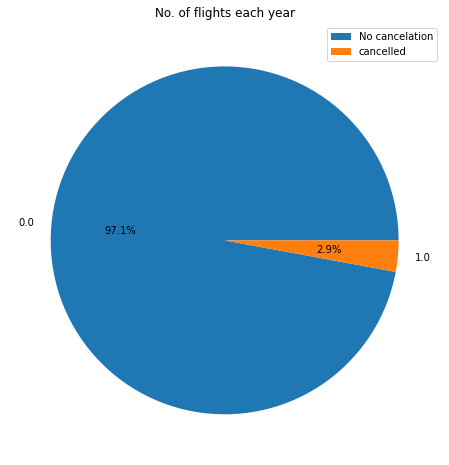

In [15]:
# the cancellation rate

plt.figure(figsize=[12,8]);

sorted_counts = flights['CANCELLED'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%');

plt.title('No. of flights each year');
plt.legend(["No cancelation", "cancelled"]);

> The chart clarifies that among the selected years,cancellation rate was small as it's less than 3% of the total flights.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

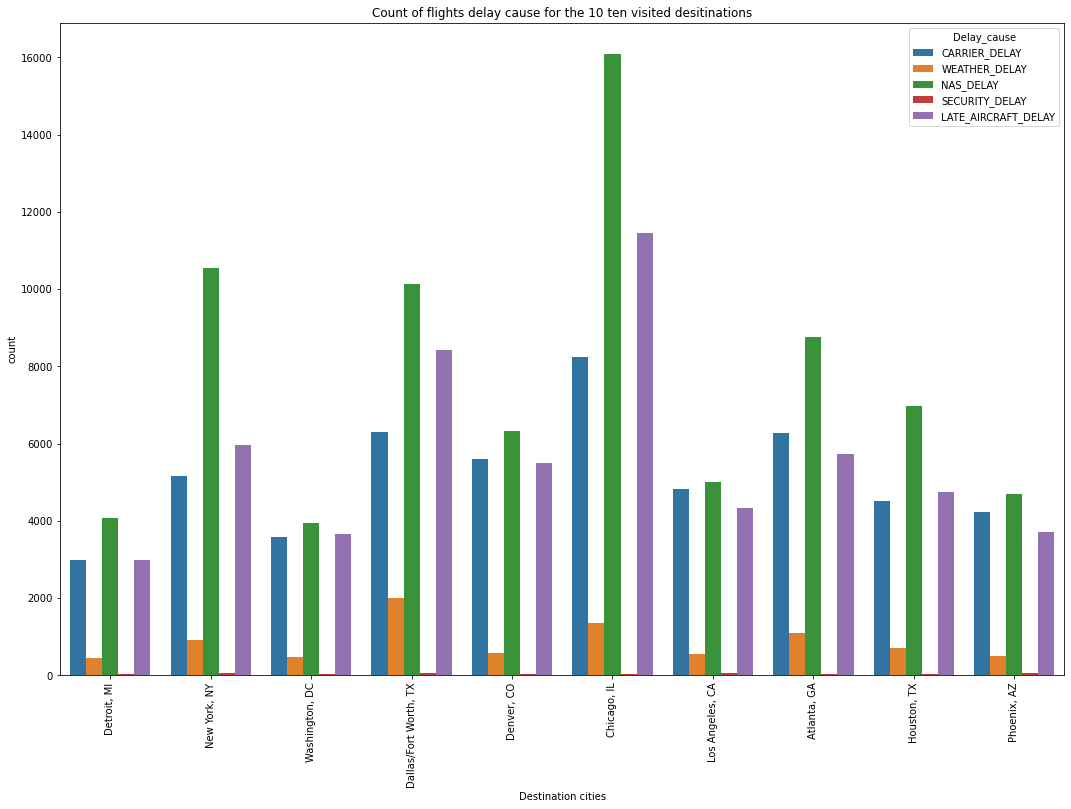

In [16]:
#the count of each flights' delay cause for the 10 ten visited desitinations

plt.figure(figsize=[18,12]);

flights_sub = flights.groupby("DEST_CITY_NAME").filter(lambda x:(x.DEST_CITY_NAME.size >= 362420))
flights_sub = flights_sub.dropna(subset = ['Delay_cause_time'])
flights_sub = flights_sub[flights_sub['Delay_cause_time'] != 0]

sb.countplot(data = flights_sub, x = 'DEST_CITY_NAME', hue = 'Delay_cause');

plt.xlabel('Destination cities');
plt.ylabel('count');
plt.title('Count of flights delay cause for the 10 ten visited desitinations');
plt.xticks(rotation=90);

> The chart shows that for the 10 displayed cities, highest delay cause is National Air System Delay but in some cities it has a very high count coparing to ther cities and to other causes in the same city. e.g : Chicago and New York.

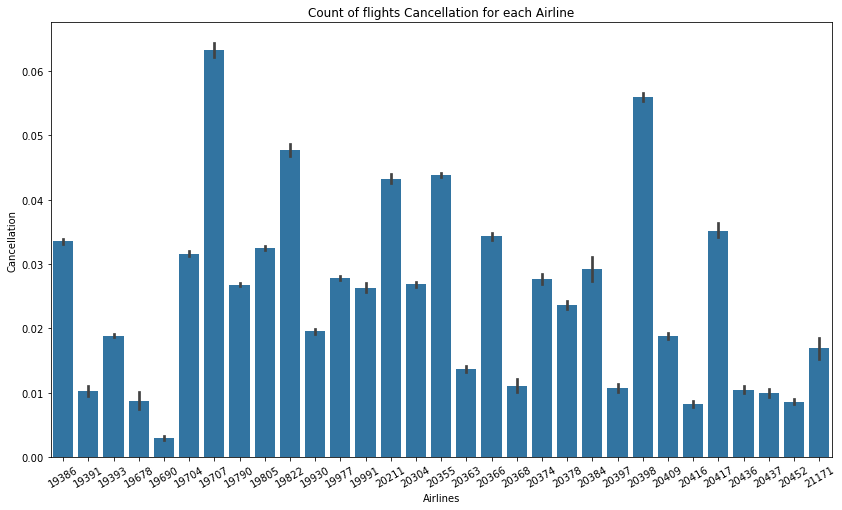

In [17]:
# The relation between cancellation and airlines.

plt.figure(figsize=[14,8]);

sb.barplot(data = flights, x = 'OP_CARRIER_AIRLINE_ID', y = 'CANCELLED', color = base_color);

plt.xticks(rotation=30);
plt.xlabel('Airlines');
plt.ylabel('Cancellation');
plt.title('Count of flights Cancellation for each Airline');

> There's a variation in the cancellation rates among airlines. The chart shows that airline (19707) has the highest cancellation rate among the chosen years while airline (19690) has the lowest one.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

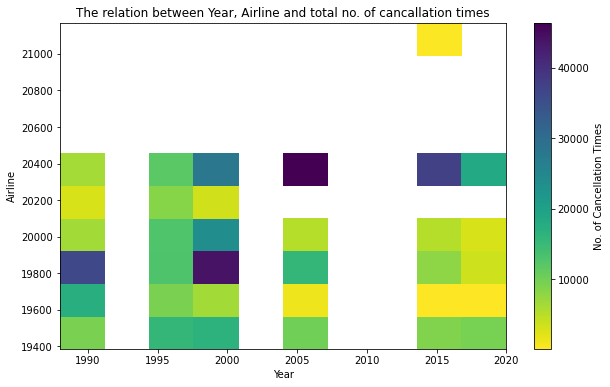

In [57]:
# the relation between year, airlines and cancallation times

plt.figure(figsize=[10,6]);

sub = flights.groupby(['OP_CARRIER_AIRLINE_ID', 'YEAR']).agg({'CANCELLED': 'sum'}).reset_index() #create new dataframe grouping
                                                                           #year and airline and the count of cancallation times
#g = sb.FacetGrid(data = sub, col = 'YEAR', height = 6, col_wrap = 3);
#g.map(plt.scatter, 'OP_CARRIER_AIRLINE_ID', 'CANCELLED');
plt.hist2d(data = sub, x = 'YEAR', y = 'OP_CARRIER_AIRLINE_ID', weights = 'CANCELLED', cmap = 'viridis_r', cmin = 0.5);

plt.colorbar(label = 'No. of Cancellation Times');
plt.xlabel('Year')
plt.ylabel('Airline');
plt.title('The relation between Year, Airline and total no. of cancallation times');

> The chart shows that year 2005 and 2000 has the highest rate of cancellation paired with 20400, 19800 airlines respectively. It also shows that most airlines has less cancellation rates through years.

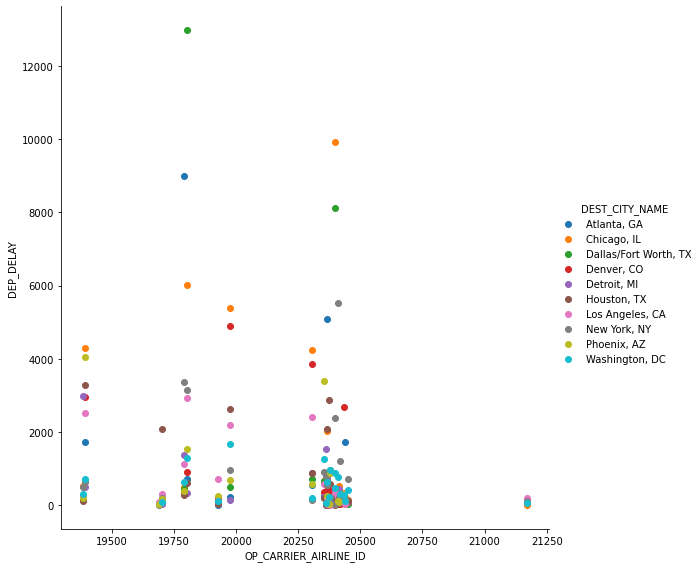

In [41]:
# the relation between destinations, airlines and delay times

sub1 = flights_sub.query('DEP_DELAY != 0')

#create new dataframe grouping destination and airline and the count of delay times

sub1 = sub1.groupby(['OP_CARRIER_AIRLINE_ID', 'DEST_CITY_NAME']).agg({'DEP_DELAY': 'count'}).reset_index()
g = sb.FacetGrid(data = sub1, hue = 'DEST_CITY_NAME', height = 8);
g.map(plt.scatter, 'OP_CARRIER_AIRLINE_ID', 'DEP_DELAY');
g.add_legend();

plt.title('The relation between Destination, Airline and total no. of Delay times');

> The chart shows that Chicago has the highest delay rates in more than three airlines. Also there's one specific airline that has extremely high rates of delay for Dallas city